# Gradijentni spust

## Gradijentni spust: Uvod i ideja

Gradijentni spust *(engl. Gradient descent)* je generički optimizacijski algoritam koji je u stanju pronaći optimalna rješenja za različiti broj problema. Temeljna ideja gradijentnog spusta jest iterativnim postupkom mijenjati parametre s ciljem minimiziranja (ili maksimiziranja) funkcije cijene.

Pojednostavljena ideja iza gradijentnog spusta leži u činjenici da funkciju cijene možemo skicirati kao "brda i doline" gdje tražimo najnižu moguću točku u koju možemo doći iz trenutne pozicije. Primjer funkcije cijene srednje kvadratne pogreške za linearnu regresiju može se vidjeti na sljedećoj slici:

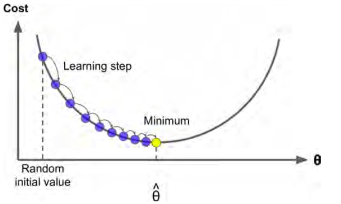


Na samom početku nasumično se odrede vrijednosti parametra $\Theta$ *(engl. random initialization)* po kojem je funkcija cijene parametrizirana. U svakoj od sljedećih iteracija mijenjamo parametar $\Theta$ na takav način da se pomičemo niz gradijent (prva derivacija funkcije cijene). Drugim riječima, izračun gradijenta daje nam smjer u kojem se nalazi "bolje" rješenje od onog trenutnog. Kako bi se odredila veličina "koraka" u smjeru ka boljem rješenju, uvodi se hiperparametar stope učenja $\alpha$ *(engl. learning rate)*.

Određivanje stope učenja $\alpha$ u izvornom algoritmu gradijentnog spusta provodi se empirijski (tako da postoji iskustvo na sličnom problemu), ili eksperimentalno koristeći metodu poput [grid-search algoritma](https://en.wikipedia.org/wiki/Hyperparameter_optimization).

Uzrok premale stope učenja rezultira da je konvergencija ka rješenju veoma spora, a ako je model limitiran brojem koraka, postoji mogućnost da model ne uspije naučiti optimalne vrijednost parametra theta. Jedan primjer premale stope učenja može se vidjeti na slici:

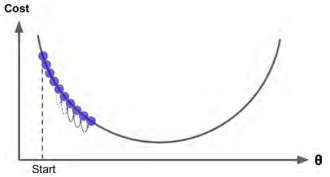

Opozitno prethodnom problemu jest prevelika stopa učenja koji uzrokuje divergenciju, odnosno model "preskoči" optimalne parametre. Primjer ovakve stope učenja nalazi se na slici:

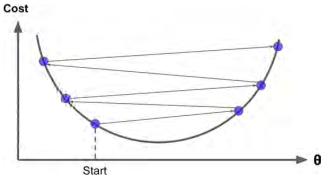


## Pseudokod gradijentnog spusta

Originalni pseudokod za gradijentni spust jest sljedeći:



$\alpha = r; (r \in \mathbb{R})$

$\text{while(convergence)} \{ $

$\quad\Theta_{n+1} = \Theta_n - \alpha\cdot\bigtriangledown_\Theta J(\Theta) \}$




gdje $\alpha$ označava stopu učenja (tipično realni broj u intervalu $0 \leq \alpha \leq 1$, uvjet $\text{"convergence"}$ može biti broj epoha (iteracija) ili preciznost modela bilo na trening setu gdje počne stagnirati, ili na cross-validacijskom setu gdje se počne povećavati i $J(\Theta)$ je funkcija cijene koja se optimizira.


## Tipovi gradijentnog spusta
Postoji mnogo različitih tipova gradijentnog spusta. Svaki od njih donosi poneko poboljšanje u odnosno na prethodnog ali ne znači nužno da je jedan tip gradijentnog spusta najbolji, odnosno i ovdje se može primijeniti *"no free lunch theorem"*. U ovom radu objasnit će se pobliže sljedeći tipovi gradijentnog spusta:

* Gradient Descent

* AdaGrad

* Momentum Optimization

* RMSProp

* Adam


### Gradient descent optimizacija
Osnovni **gradent descent** opisan je prethodno u ovoj skripti. Dakle, gradient descent je iterativni optimizacijski algoritam prvog stupnja koji u svakoj iteraciji čini korak proporcionalan negativu gradijenta (ili procjene gradijenta) funkcije cilja u trenutnoj točki.

Formula po kojoj se gradient descent računa jest:

$\quad\Theta_{n+1} = \Theta_n - \alpha\cdot\bigtriangledown_\Theta J(\Theta) $

Parametar koji se mora zadati kada se koristi gradient descent jest:

* $\alpha$ - stopa učenja (engl. learning rate) koji kaže za koliko se prilikom svakog koraka ažuriraju parametri

##### Konvergencija algoritma na MNIST i Housing testu podataka

Konvergencija je prikazana na prosječnoj vrijednosti $100$ testova za svaku epohu. Na MNIST setu podataka kao funkcija cilja koristila se softmax funkcija, dok se na Housing setu podataka koristila srednja kvadratna pogreška.

MNIST set podataka | Housing set podataka  
:-----------------:|:--------------------:
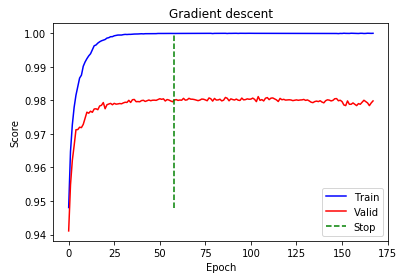|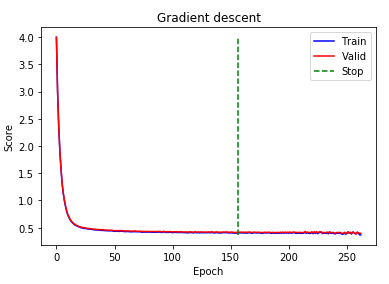


### AdaGrad optimizacija
Ako zamislimo problem u kojem funkcija cilja izgleda kao izdužena zdjela, tada će gradient descent krenuti vrlo brzo prema globalnom optimumu, a potom zbog malog gradijenta će usporiti i napredovati izrazito sporo. AdaGrad verzija gradijentnog spusta rješava ovaj problem uvođenjem adaptivne stope učenja. Adaptivna stopa učenja se ostvaruje skaliranjem gradijentnog vektora.

Formula po kojoj se AdaGrad računa jest:

1. $\quad s \leftarrow s + \bigtriangledown_\Theta J(\Theta) \otimes \bigtriangledown_\Theta J(\Theta) $

2. $\quad\Theta_{n+1} = \Theta_n - \alpha\cdot\bigtriangledown_\Theta J(\Theta) \oslash \sqrt{s + \epsilon} $

Parametri u formuli su sljedeći:

* $\alpha$ - stopa učenja *(engl. learning rate)* koji kaže za koliko se prilikom svakog koraka ažuriraju parametri
* $\epsilon$ - jako mali broj tipično $10^{-8}$ kako bi se izbjeglo dijeljenje sa $0$

Primijetite kako se vektor $s$ zapravo računa $s_i \leftarrow s_i + (\frac{\delta}{\delta \Theta_iJ(\Theta)})^2$, odnosno vektor $s$ akumulira kvadrate parcijalnih derivacija funkcije cijene u ovisnosti o parametru $\Theta$. Drugi korak je identičan gradijentnom spustu uz jednu razliku koja se očituje u dijeljenju gradijenta s korijenom vektora $s$ pribrojenog s konstantom $\epsilon$. Drugim riječima na ovaj način se veliki gradijent zadržava i prolongira dulje u izračunu, odnosno on se raspada (*engl. decay*).

Prikaz usporedbe AdaGrad algoritma i Gradient Descent-a na jednostavnom problemu regresije:

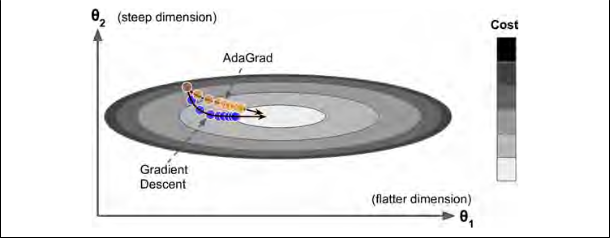

AdaGrad često ima dobre performanse na jednostavnim kvadratnim problemima, ali na treniranju neuronskih mreža često se zaustavi prebrzo jer se stopa učenja smanji da razine kada više nema napretka (u potpunosti se raspadne). Stoga se AdaGrad ne koristi često u neuronskim mrežama.

##### Konvergencija algoritma na MNIST i Housing testu podataka

Konvergencija je prikazana na prosječnoj vrijednosti $100$ testova za svaku epohu. Na MNIST setu podataka kao funkcija cilja koristila se softmax funkcija, dok se na Housing setu podataka koristila srednja kvadratna pogreška.

MNIST set podataka | Housing set podataka  
:-----------------:|:--------------------:
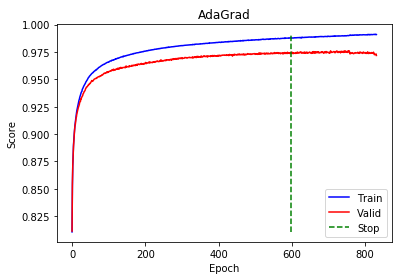|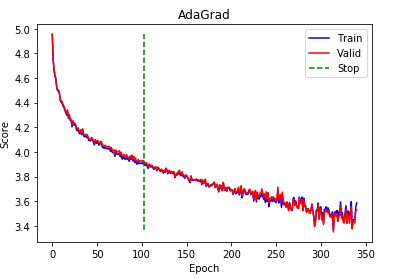

### RMSProp
AdaGrad je patio od problema prebrzog usporavanja rezultirajući nemogućnošću pronalaženja globalnog optimuma. RMSProp algoritam popravlja ovaj problem tako da akumulira samo gradijente nekoliko prošlih iteracija (a ne sve od početka).

Efekt akumuliranja postiže se raspadom gradijenta što je vidljivo iz formula:

1. $\quad s \leftarrow \beta \cdot s + (1-\beta)\cdot \bigtriangledown_\Theta J(\Theta) \otimes \bigtriangledown_\Theta J(\Theta)$
2. $\quad\Theta_{n+1} = \Theta_n - \alpha\cdot\bigtriangledown_\Theta J(\Theta) \oslash \sqrt{s + \epsilon} $

Parametri u formulama su sljedeći:
* $\alpha$ - stopa učenja *(engl. learning rate)* koji kaže za koliko se prilikom svakog koraka ažuriraju parametri.
* $\beta$ - stopa raspada *(engl. decay)* koji se tipično postavlja na vrijednost $0.9$ te često nema potrebe za njegovim mijenjanjem.
* $\epsilon$ - jako mali broj tipično $10^{-8}$ kako bi se izbjeglo dijeljenje sa $0$.


Osim na vrlo jednostavnim problemima, RMSProp će gotovo uvijek ostvariti bolje performanse nego li AdaGrad. Također brži konvergira od Momentum optimisation algoritma. Drugim riječima, do pojave Adam optimizacije bio je preferirani optimizator da treniranje neuronskih mreža.

##### Konvergencija algoritma na MNIST i Housing testu podataka

Konvergencija je prikazana na prosječnoj vrijednosti $100$ testova za svaku epohu. Na MNIST setu podataka kao funkcija cilja koristila se softmax funkcija, dok se na Housing setu podataka koristila srednja kvadratna pogreška.

MNIST set podataka | Housing set podataka  
:-----------------:|:--------------------:
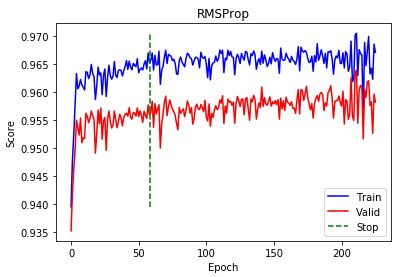|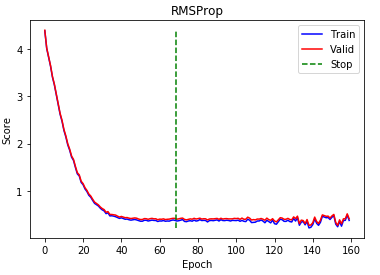

### Momentum Optimisation
Ideja iza Momentum Optimisation algoritma leži u brzini kotrljanja, naime, ako se kugla kotrlja niz padinu, ona dobiva na brzini. Na sličan način može se promatrati i gradijentni spust: uzevši u obzir prethodne vrijednosti gradijenata stvara se brzina spuštanja u kojoj trenutni gradijent služi samo kao akceleracija.

Pretočivši navedeno u formule, one glase:

1. $\quad m_{n+1} \leftarrow \beta \cdot m_{n} + \alpha\cdot\bigtriangledown_\Theta J(\Theta_n) $

2. $\quad \Theta_{n+1} = \Theta_{n} - m_{n+1}$

Parametri u formuli su sljedeći:

* $\alpha$ - stopa učenja *(engl. learning rate)* koji kaže za koliko se prilikom svakog koraka ažuriraju parametri
* $\beta$ - momentum *(engl. momentum)* koji se postavlja na vrijednost $0 \leq \beta \leq 1$. $\beta$ označava trenje i tipična vrijednost mu je $0.9$ ($0.9999$ za velike setove podataka)
* $m$ - momentum vektor koji označava akumuliranu akceleraciju (gradijent) za koji se parametri ažuriraju.

Ideja je da vektor $m$ predstavlja brzinu spusta dok gradijent zapravo određuje akceleraciji. Rezultat ovakvog pristupa jest da se brzina napretka zadržava i na platoima što omogućuje izlazak iz lokalnih optimuma i napredak kroz područja "malog nagiba" veoma brzo (za razliku od osnovnog algoritma gradijentnog spusta).

U dubokim neuronskim mrežama koje ne koriste *batch normalisation*, gornji slojevi mogu često sadržavati ulazne podatke različitih skala. Konvergenciju u tom slučaju uvelike ubrzava momentum optimisation. Jedina mana jest momentum optimisation algoritma jest uvođenje parametra $\beta$.

##### Konvergencija algoritma na MNIST i Housing testu podataka

Konvergencija je prikazana na prosječnoj vrijednosti $100$ testova za svaku epohu. Na MNIST setu podataka kao funkcija cilja koristila se softmax funkcija, dok se na Housing setu podataka koristila srednja kvadratna pogreška.

MNIST set podataka | Housing set podataka  
:-----------------:|:--------------------:
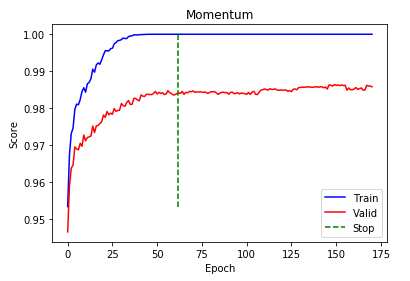|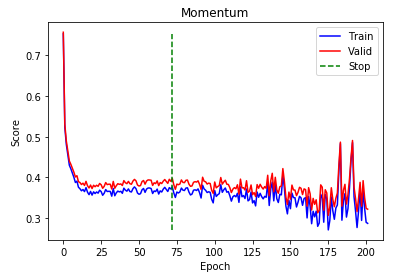

### Adam
Adam (akronim za *engl. adaptive moment estimation*) je algoritam koji kombinira Momentum optimisation algoritam i RMSProp: kao i Momentum optimisation koristi momentum prilikom računanja idućeg gradijenta, dok je od RMSProp algoritma uzeo raspad kvadrata prethodnih gradijenata.

Matematički zapis prethodno opisanog algoritma glasi:
1. $\quad m \leftarrow \beta_1 \cdot m + (1-\beta_1)\cdot \bigtriangledown_\Theta J(\Theta)$
2. $\quad s \leftarrow \beta_2 \cdot s + (1-\beta_2) \bigtriangledown_\Theta J(\Theta) \otimes \bigtriangledown_\Theta J(\Theta)$
3. $\quad m \leftarrow \frac{m}{1-\beta_1^T}$
4. $\quad s \leftarrow \frac{s}{1 - \beta_2^t}$
5. $\quad \Theta_{n+1} \leftarrow \Theta_n - \alpha m \oslash\sqrt{s + \epsilon}$

Parametri u formulama su sljedeći:
* $\alpha$ - stopa učenja *(engl. learning rate)* koji kaže za koliko se prilikom svakog koraka ažuriraju parametri
* $\beta_1$ i $\beta_2$ - stope raspada *(engl. decay)* koji se tipično postavljaju na vrijednost $0.9$ i $0.99$ respektivno, te često nema potrebe za njihovim mijenjanjima.
* $\epsilon$ - jako mali broj tipično $10^{-8}$ kako bi se izbjeglo dijeljenje sa $0$.
* $T$ redni broj iteracije počevši sa $1$

Uočavamo da je zadržan dio raspada momenta iz Momentum optimizacije dok je iz RMSProp algoritma preuzeto svojstvo da se gleda samo nekoliko prošlih gradijenata. Također potrebno je uočiti formule $3.$ i $4.$ koje su zapravo tehnički detalj: budući da su $m$ i $s$ inicijalizirani na $0$ oni će težiti ka $0$ tijekom konvergencije, stoga se uvode ova dva koraka kako i se "ubrzao" početak treniranja.

Budući da Adam, poput AdaGrad i RMSProp algoritama, spada u kategoriju optimizatora koji imaju adaptivnu stopu učenja, često je inicijalna vrijednost $\alpha = 0.001$ zadovoljavajuća. Ovo svojstvo čini Adam optimizator poprilično jednostavnim za upotrebu.

##### Konvergencija algoritma na MNIST i Housing testu podataka

Konvergencija je prikazana na prosječnoj vrijednosti $100$ testova za svaku epohu. Na MNIST setu podataka kao funkcija cilja koristila se softmax funkcija, dok se na Housing setu podataka koristila srednja kvadratna pogreška.

MNIST set podataka | Housing set podataka  
:-----------------:|:--------------------:
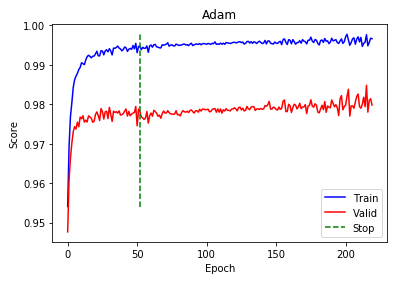|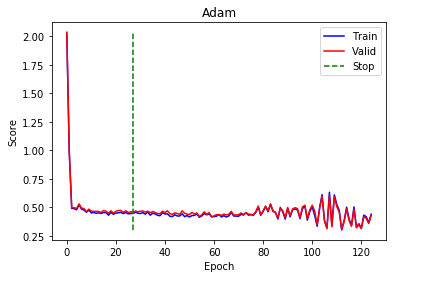

## Planiranje stope učenja

Premda neki od navedenih optimizacijskih algoritama koriste adaptivnu prilagodbu stope učenja, i dalje inicijalna procjena stope učenja igra veliku ulogu u brzini konvergencije samog algoritma. Imati veliku stopu učenja jest korisno na početku kada je gradijent veliki, kako se približavamo minimumu, korisnije je imati malu stopu učenja.

Drugim riječima, uvelike bi doprinijelo kada bi postojao raspad stop učenja, kao što prikazuje sljedeća slika:
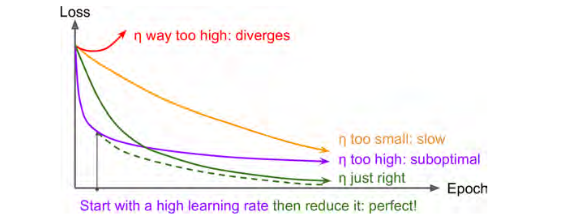

Postoji cijeli niz metoda planiranja stope učenja, ali jedna od najkorištenijih jest **Exponential Scheduling**.

Kod Exponential Scheduling-a idea jest da se stopa učenja $\alpha$ u svakoj iteraciji mijenja po sljedećoj formuli:

$$\alpha(t) = \alpha_0 \cdot 10^{-\frac{t}{r}}$$

Kao što vidimo u formuli je potrebno zadati inicijalnu stopu učenja $\alpha_0$ i broj koraka $r$. Također mehanizam je vrlo jednostavan, svakih $r$ koraka stopa učenja će se spustiti za faktor $10$.

Konačni zaključak prilikom planiranja stope učenja jest da svaki optimizacijski algoritam može imati koristi od iste.

## Rezultati na MNIST setu podataka - klasifikacija

U skripti *Mnist Test* implementirana je neuronska mreža koja je testirana s trening setu od $55000$ slika i validirana na setu od $5000$ slika. Testirani su svi optimizacijski algoritmi te se njihovi grafovi konvergencije u odnosu na broj potrebnih epoha nalaze na sljedećim slikama:(svaki algoritam se testirao 100 puta s ispremiješanim podacima za test set podataka i validacijski set podataka):

GD | ADAGRAD | Momentum 
:-:|:-------:|:--------:
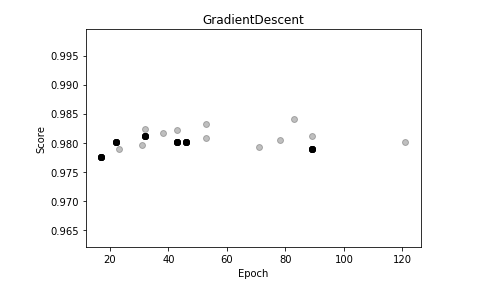 | 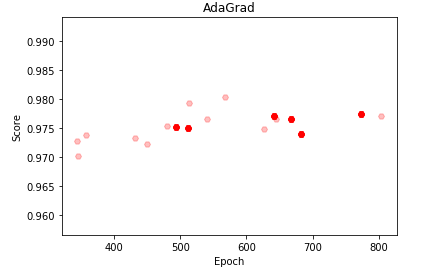| 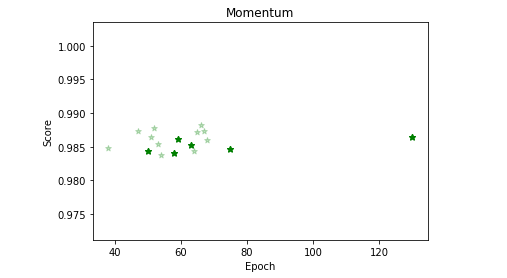


RMSProp | Adam | All
:------:|:----:|:----:
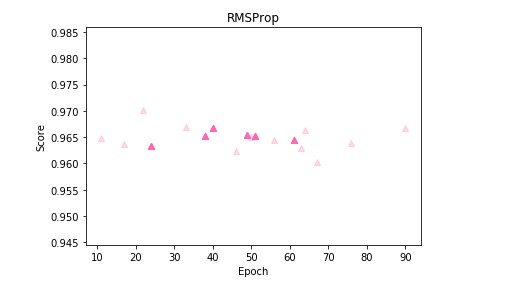 | 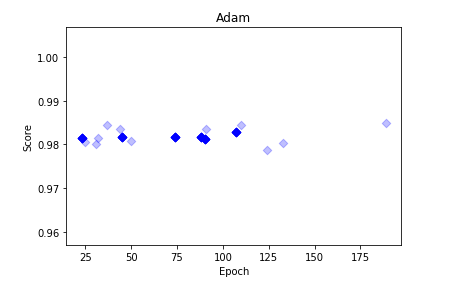 | 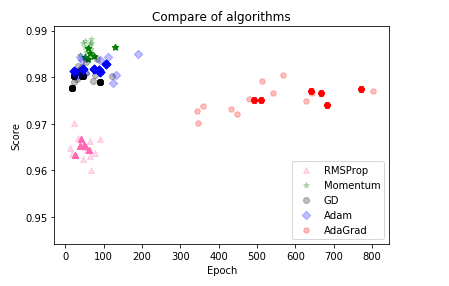

All without Adagrad |
:------------------:|
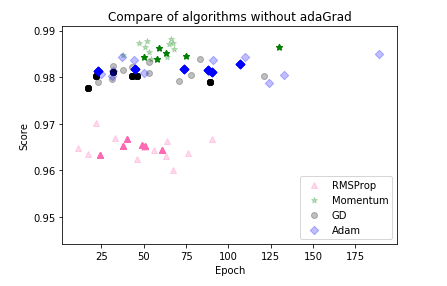

Usporedba preciznosti (*Score*):

|     Ime metode    | Srednja vrijednost | Median |  Varianca  | Standardna devijacija |
|:-----------------:|:------------------:|:------:|:----------:|:---------------------:|
| Gradijentni spust |       0.9799       | 0.9802 | 1.6545e-06 |         0.0013        |
|      AdaGrad      |       0.9758       | 0.9760 | 2.3288e-06 |         0.0015        |
|      Momentum     |       0.9852       | 0.9852 | 1.0784e-06 |         0.0010        |
|      RMSProp      |       0.9650       | 0.9652 | 1.6642e-06 |         0.0013        |
|        Adam       |       0.9818       | 0.9816 | 6.8756e-07 |         0.0008        |

Usporedba broja epoha konvergencije (*Epoch*):

|     Ime metode    | Srednja vrijednost | Median | Varianca | Standardna devijacija |
|:-----------------:|:------------------:|:------:|:--------:|:---------------------:|
| Gradijentni spust |        43.96       |  43.00 |  624.90  |         25.00         |
|      AdaGrad      |       616.36       | 643.00 | 12004.91 |         109.57        |
|      Momentum     |        70.86       |  59.00 |  678.58  |         26.05         |
|      RMSProp      |        44.51       |  49.00 |  191.95  |         13.85         |
|        Adam       |        71.64       |  74.00 |  1027.49 |         32.05         |

Usporedba koristeći Pareto frontu: (AdaGrad metoda je ona neuračunjiva zbog velikog broja epoha) ([Više o Pareto fronti](https://en.wikipedia.org/wiki/Pareto_efficiency)):

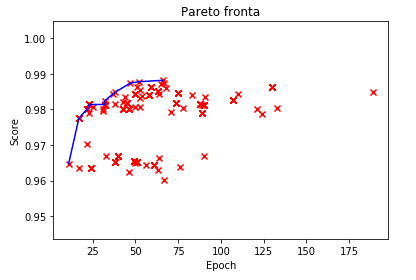

Ime metode | Udio u Pareto fronti
:---------:|:-----------------------:
Gradijentni spust | 0.5769
AdaGrad           | 0.0
Momentum          | 0.0769
RmsProp           | 0.0192
Adam              | 0.3269

## Rezultati na Housing setu podataka - regresija

U skripti *Housing Test* implementirana je neuronska mreža koja je testirana na trening setu od $15480$ podataka i validirana na setu od $5160$ podataka. Testirani su svi optimizacijski algoritmi te se njihovi grafovi rezultata konvergencije u odnosu na broj potrebnih epoha nalaze u nastavku: (svaki algoritam se testirao 100 puta sa ispremiješanim podacima za test set podataka i validacijski set podataka):

GD | ADAGRAD | Momentum 
:-:|:-------:|:--------:
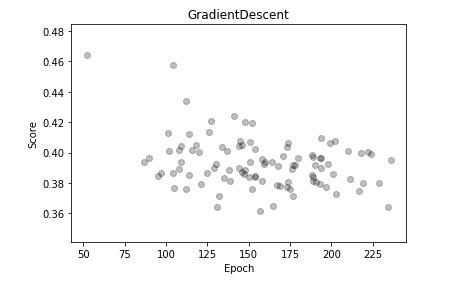|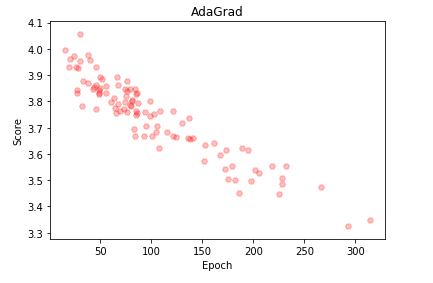|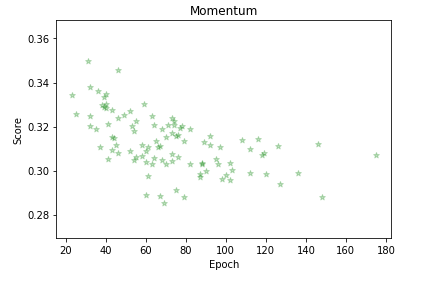


RMSProp | Adam | All
:------:|:----:|:----:
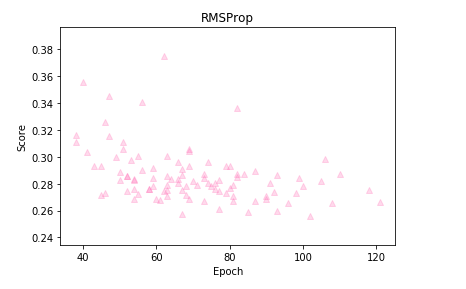|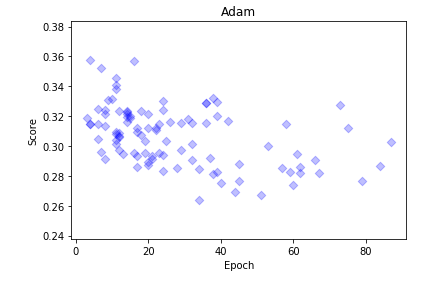|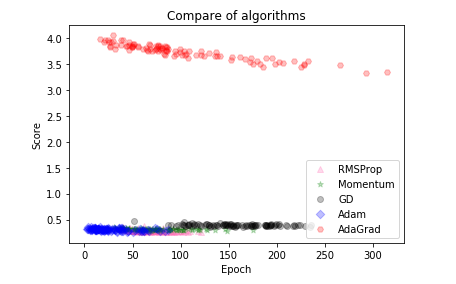

All without Adagrad |
:------------------:|
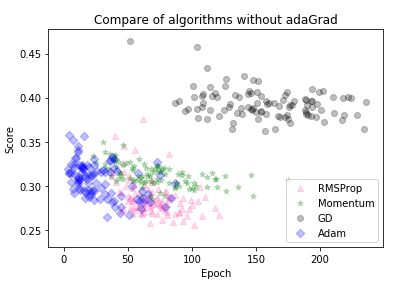

Statistika rezultata može se vidjeti u sljedećim tablicama:

Usporedba preciznosti (*Score*):

|     Ime metode    | Srednja vrijednost | Median | Varianca | Standardna devijacija |
|:-----------------:|:------------------:|:------:|:--------:|:---------------------:|
| Gradijentni spust |       0.3932       | 0.3918 |  0.0003  |         0.0166        |
|      AdaGrad      |       3.7427       | 3.7671 |  0.0220  |         0.1482        |
|      Momentum     |       0.3125       | 0.3113 |  0.0002  |         0.0128        |
|      RMSProp      |       0.2860       | 0.2827 |  0.0004  |         0.0202        |
|        Adam       |       0.3067       | 0.3084 |  0.0004  |         0.0197        |

Usporedba broja epoha konvergencije (*Epoch*):

|     Ime metode    | Srednja vrijednost | Median | Varianca | Standardna devijacija |
|:-----------------:|:------------------:|:------:|:--------:|:---------------------:|
| Gradijentni spust |       156.73       | 154.00 |  1468.48 |         38.32         |
|      AdaGrad      |       102.56       |  84.00 |  4256.17 |         65.24         |
|      Momentum     |        71.81       |  68.00 |  877.01  |         29.61         |
|      RMSProp      |        69.97       |  67.50 |  343.43  |         18.53         |
|        Adam       |        27.70       |  21.00 |  403.35  |         20.08         |


Usporedba koristeći Pareto frontu: (AdaGrad metoda je ona neuračunjiva zbog velikog broja epoha): ([Više o Pareto fronti](https://en.wikipedia.org/wiki/Pareto_efficiency))

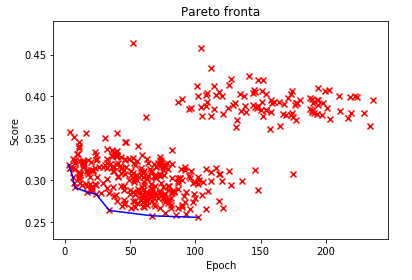

Ime metode | Udio u Pareto fronti
:---------:|:-----------------------:
Gradijentni spust | 0.0
AdaGrad           | 0.0
Momentum          | 0.0
RmsProp           | 0.2
Adam              | 0.8


## Usporedba rezultata

Kod problema klasifikacije koristila se izrazito plitka neuronska mreža koja se sastojala od samo dva skrivena sloja s po $100$ neurona u svakome. AdaGrad optimizator ističe se po izrazito lošim performansama budući da njegov gradijent ubrzo nestane te postane jako mali što rezultira velikim brojem epoha potrebnih za konvergenciju u neki lokalni minimum koji je znatno lošiji od rezultata drugih algoritama. S druge strane Gradijentni spust je polučio najbolji rezultat s obzirom na brzinu konvergencije, što je za plitku neuronsku mrežu očekivano. Slijede ga Momentum, pa Adam i RMSProp algoritmi. Bitno opažanje jest i da je RMSProp algoritam znatno brže konvergirao od Adam-a, ali je polučio za gotovo $2\%$ lošiji rezultat.

S druge strane na problemu regresije koristila s neuronska mreža s 4 skrivena sloja s brojem neurona: $50, 50, 25, 10$ respektivno prema slojevima. Rezultati kod regresije pokazuju da je AdaGrad ponovno najlošiji prvenstveno zato što nije uspio konvergirati u neki bolji rezultat, odnosno inicijalna vrijednost parametra $\alpha$ (koja je jednaka u svim testiranim algoritmima) nije bila dovoljno mala da bi AdaGrad krenuo prema rješenju. Gradijentni spust je postigao načelno lošije rješenje od drugih algoritama (trebalo mu je više epoha za lošiji rezultat). Za preostale algoritme, najbolji rezultat (broj potrebnih epoah za preciznost) jest Adam. Njega slijedi RMSProp te na posljetku Momentum.

Rezultati su zapravo dokazali da kod treniranja dubokih neuronskih mreža, prednost imaju Adam i RMSProp, dok za jednostavnije neuronske mreže i "plitke" numeričke probleme Gradijentni descent i Momentum optimizator mogu biti čak i bolji od prethodna dva algoritma. Naposljetku, AdaGrad se pokazao kao najosjetljiviji algoritam po pitanju odabira vrijednosti hiperparametara te se sugerira odabir drugih optimizacijskih algoritama. Ovom zaključku u prilog ide i izračun udjela svake testirane metode u Pareto fronti. 